
# Práctica 4: Metaheurísticas basadas en poblaciones - Sistemas de Colonias de Hormigas

<center><h3>
    Nerea Freiría Alonso
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Colonias.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Colonias.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Colonias.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.

## El Problema del Viajante de Comercio (VC) con Sistemas de Colonias de Hormigas

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver
el problema del VC mediante la metaheurística (MH) de algoritmos para sistemas de colonias de
hormigas (ACS, *Ant Colony Systems*, del inglés).

Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás algunos de los parámetros de diseño del algoritmo en relación a la calidad de las soluciones alcanzadas.

Recuerda que debes importar el módulo Python que acompaña esta práctica, que como ocurría en prácticas anteriores implementa la carga de datos y el cálculo de distancias utilizando una matriz de adyacencia de acuerdo a la definición del problema ya vista.

In [1]:
from helpers_mod_aco import *

g1=Localizaciones(filename='./data/grafo8cidades.txt')
g2= Localizaciones(filename='./data/US120.txt')
# distancia entre ciudad 0 y 1 son unos 55 km
print (g1.distancia(0,1))
g1.nciudades

55.88273580792048


8


## P4.1: Implementación de Sistemas de Colonias de Hormigas (SCH)


Implementa el algoritmo de sistemas de colonia de hormigas que materializa la MH vista en la sesión expositiva y revisar las notas particulares para el problema de VC. Para facilitar vuestra labor, se os proporciona aquí una descripción algorítmica de referencia.



1. Establecer parámetros: G, m, q<sub>0</sub>, τ<sub>0</sub>, ρ, 𝛏, iter<sub>min</sub>, iter<sub>max</sub>, iter<sub>sinmejoras</sub>, ratio<sub>mejora</sub>

2. Inicializar pistas de feromonas: ∀ i, j τ<sub>ij</sub> = τ<sub>0</sub>

3. HACER

    3.1. PARA cada hormiga k en colonia m HACER
        3.1.1.construir una solución para k siguiendo la regla de decisión a cada paso:
              
$$
j=
\begin{cases}
argmax_{l\in N_i^k} \{ [\tau_{il}]^\alpha [\eta_{il}]^\beta \}, \text{if } q \leq q_0;\\
J, \text{en otro caso;}
\end{cases}
$$
              
    , donde J es la exploración dirigida por:
              
$$ p_{ij}^{k} = \frac{[\tau_{ij}]^\alpha [\eta_{ij}]^\beta}{\sum_{l\in N_i^k} [\tau_{il}]^\alpha [\eta_{il}]^\beta},    \text{if } j\in N_i^k $$

      3.1.2. (opcional) Aplicar actualización de feromona local/online con la regla:
$$ τ_{ij} ← (1 - 𝛏) τ_{ij} + 𝛏 τ_{0} $$
    
    3.2. FPARA 
        
    3.3. Evalúa soluciones en la colonia m y registrar la mejor solución hasta el momento T<sup>bs</sup>.

    3.4. Aplicar actualización de feromona global/offline con la regla:

$$τ_{ij} ← (1-ρ) τ_{ij} + ρ Δτ_{ij}^{bs}, ∀(i, j) ∈T^{bs}$$

4. HASTA cumplir la condición de parada



La implementación debe permitir la inicialización de los parámetros y estructuras de información asociadas como sigue:
- Probabilidad de explotación q<sub>0</sub>=0.5.


- Inicialización de la información heurística: η<sub>ij</sub>=1/d<sub>ij</sub>, ∀(i, j), donde d<sub>ij</sub> es la distancia directa entre las ciudades *i* y *j*.


- Inicialización de las pistas de feromonas (depósito inicial): τ<sub>ij</sub>= τ<sub>0</sub>= 1 /(n C<sup>NN</sup>) ∀(i, j) donde n es el número de ciudades y C<sup>NN</sup> es el coste del tour generado siguiendo una estrategia voraz del vecino más próximo (NN, *Nearest Neighbour*).


- Parámetros de influencia de las pistas de feromonas (α) e información heurística (β) en la regla de decisión establecidos a 1 y 3 respectivamente


 
- Ratio de evaporación de feromona: deberás probar con diferentes magnitudes (p.ej., ρ=0.01, ρ=0.1 y ρ=0.5)



- Actualización de feromona global con depósito elitista basado en la mejor solución (bs, *best solution*):τ<sub>ij</sub> ← (1-ρ) τ<sub>ij</sub> + ρ Δτ<sub>ij</sub><sup>bs</sup>, ∀(i, j) ∈T<sup>bs</sup>, donde Δτ<sub>ij</sub><sup>bs</sup>=1/C<sup>bs</sup>



- Actualización de feromona local siguiendo la regla:τ<sub>ij</sub> ← (1- 𝛏) τ<sub>ij</sub> + 𝛏 τ<sub>0</sub>, con 𝛏=0.1



- Condición de parada que de manera combinada tenga en cuenta iter<sub>min</sub>, iter<sub>max</sub>, iter <sub>sinmejoras</sub>, ratio<sub>mejora</sub>



- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros puedan ser establecidos en cada ejecución/problema, y que puedas modificar la inicialización heurística y de pistas de feromona, puedas fácilmente reemplazar las reglas de actualización de feromonas, activar/desactivar la actualización local de actualización de feromona, etc.

In [135]:
import random

In [252]:
def ini_matriz(g):
    N=[[0 for i in range(g.nciudades)] for j in range(g.nciudades)]
    for i in range (g.nciudades):
        for j in range (g.nciudades):
            aux=g.distancia(i,j)
            if(i!=j):
                N[i][j]=1/aux
    return N

def coste(g, solucion):
    coste=0
    solucion_aux=[0]+solucion+[0]
    for i in range(len(solucion_aux)-1):
        coste+=g.distancia(solucion_aux[i],solucion_aux[i+1])
    return coste

def inicializar_feromonas(g):
    solucion=[0] #añadimos el nodo inicial a la solucion
    #creamos una lista con los nodos del grafo
    nodos=[x for x in range(1,g.nciudades)]
    
    #creamos un bucle para que se repita hasta que la lista de nodos este vacia
    while len(nodos)>0:
        #creamos una variable para almacenar el nodo mas cercano
        nodo_cercano=nodos[0]
        #creamos una variable para almacenar la distancia del nodo mas cercano
        distancia_cercana=g.distancia(solucion[-1],nodos[0])
        #creamos un bucle para recorrer la lista de nodos
        for nodo in nodos:
            #comprobamos si la distancia del nodo actual es menor que la del nodo mas cercano
            if g.distancia(solucion[-1],nodo)<distancia_cercana:
                #si es asi actualizamos la distancia mas cercana y el nodo mas cercano
                distancia_cercana=g.distancia(solucion[-1],nodo)
                nodo_cercano=nodo
        #añadimos el nodo mas cercano a la solucion
        solucion.append(nodo_cercano)
        #eliminamos el nodo mas cercano de la lista de nodos
        nodos.remove(nodo_cercano)
  
    #eliminamos el primer 0
    solucion.pop(0)
   
    feromonas=[[0 for i in range(g.nciudades)] for j in range(g.nciudades)]
    aux=1/(g.nciudades*coste(g, solucion))
    for i in range( g.nciudades):
        for j in range(g.nciudades):
            feromonas[i][j]=aux
    return feromonas,aux


def actualizacion_feromonas_global(matrizFeromonas, solucion,ratioEvap, g):
    mejorSolucion = (solucion[0]+[0],solucion[1])
    Cbs=mejorSolucion[1]
    Tbs=1/Cbs
    for i in range(len(mejorSolucion[0])-1):
        matrizFeromonas[mejorSolucion[0][i]][mejorSolucion[0][i+1]]=((1-ratioEvap)* matrizFeromonas[mejorSolucion[0][i]][mejorSolucion[0][i+1]])+(ratioEvap*Tbs)
    return matrizFeromonas



def actualizar_feromonas_local(feromonas, solucioni, solucionj, t0, xi):
    #actualizamos la funcionalidad de las feromonas  local con la siguiente formula τij ← (1- 𝛏) τij + 𝛏 τ0, con 𝛏=0.1
    feromonas[solucioni][solucionj]=(1-xi)* feromonas[solucioni][solucionj]+xi*t0
    return feromonas
    

#funcion que seleciona la siugiente ciudad a visitar de la hormiga segun la regla de transicion
def seleccionar_siguiente_ciudad(N, feromonas, solucion, alpha, beta,g):
    
    nodos=[x for x in range(g.nciudades)]
    for nodo in solucion:
        nodos.remove(nodo)
        
    probabilidades=[]
    for nodo in nodos:
        probabilidades.append((nodo,(feromonas[solucion[-1]][nodo]**alpha)*(N[solucion[-1]][nodo]**beta)))

    nodo_seleccionado=sorted(probabilidades, key=lambda x:x[1], reverse=True)[0][0]
    #devolvemos el nodo seleccionado
    return nodo_seleccionado


def exploracion_dirigida(N, feromonas, solucion, alpha, beta,g):
    #creamos una lista con los nodos del grafo
    nodos=[x for x in range(g.nciudades)]
    numerador=[]

    for nodo in solucion:
        nodos.remove(nodo)
    
    for nodo in nodos:
        numerador.append((nodo,(feromonas[solucion[-1]][nodo]**alpha)*(N[solucion[-1]][nodo]**beta)))
        
    resu=[]
    suma= sum([x[1] for x in numerador])
    
    for num in numerador:
        resu.append((num[0],num[1]/suma))
               
    prob= random.uniform(0,1)   
    actual=0
    for re in resu:
        actual += re[1]
        if(actual> prob):
            return re[0]
        
    return re[-1]

def mejor_solucion(soluciones, g):
    sol_costes=[]
    for i in soluciones:
        sol_costes.append((i, coste(g, i)));
        

    mejor_solucion=sorted(sol_costes,key=lambda x:x[1])[0]

    return mejor_solucion;

    
def colonia_hormigas(g, m_hormigas, ratioMejora,minIter, maxIter, noMejorasIter,xi=0.1,  ratioEvap=0.1, q0=0.5,alpha=1, beta=3):
    N=ini_matriz(g)
    feromonas, t0 =inicializar_feromonas(g)
    iteracion=0
    noMejoras=0
    ratio=math.inf

    mej_sol=[[], math.inf]
    mej_sol_aux=[[], math.inf]
    
    while (iteracion < minIter) or (iteracion < maxIter and noMejoras<noMejorasIter and ratio>ratioMejora):
        
        
        solucion=[[0] for i in range(m_hormigas)]
        
        iteracion+=1
        for sig_ciudad in range(g.nciudades-1):
            
            for k in range(m_hormigas):
                #construímos la solución de la hormiga  según probabilidad
                if random.uniform(0,1)<=q0:
                    # Explotacion - intensificacion - monotono - convergente - optimizacion
                    j=seleccionar_siguiente_ciudad(N, feromonas, solucion[k], alpha, beta,g)
                else:
                     #realizamos exploración dirigida - exploracion - estocastico
                    j=exploracion_dirigida(N, feromonas, solucion[k], alpha, beta, g)
                    
                solucion[k].append(j)
            
                #aplicmos la regla de actualización de feromonas local
                feromonas=actualizar_feromonas_local(feromonas, solucion[k][-2],solucion[k][-1], t0, xi)
   
        #actualizamos feromonas del 0 final
        for k in range(m_hormigas):
            actualizar_feromonas_local(feromonas,solucion[k][-1], 0, t0,xi)
        
        
        
        
        #escogemos la mejor solucion
        mej_sol_aux= mejor_solucion(solucion, g)    
        if(mej_sol[1] > mej_sol_aux[1]):
            mej_sol=mej_sol_aux
            noMejoras=0
            if(len(mej_sol[0])!=0):
                ratio=(- mej_sol_aux[1]+  mej_sol[1])/mej_sol[1]
         
     
        
        noMejoras+=1
        #actualizamos feromona global
        feromonas=actualizacion_feromonas_global(feromonas, mej_sol, ratioEvap,g1)

    return mej_sol


❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). Explica también cómo has realizado la verificación de tu implementación.

Para este código se han utilizado diversas funciones auxiliares para así modularizar más el código y a su vez, hacer que sea más fácil de leer.
Las funciones son:
- **ini_matriz**:inicializa la matriz de heurísticos, se le proporciona las ciudades y devuelve la matriz heurística.
- **coste(g, solucion)**: función que calcula el coste asociado a una solución, los parámetros son las ciudades y la solución de la que se quiere calcular el coste, devuelve coste.
- **def inicializar_feromonas(g):**: calcula la solución voraz e inicializa la matriz de feromonas, solo se le pasa como parámetro la lista de localizaciones y devuelve la matriz de feromonas y el coste del camino de la solución voraz
- **actualizacion_feromonas_global(matrizFeromonas, solucion,ratioEvap, g)**: la función realiza la actualización de la martiz de feromonas a nivel global, cuando la solución de la hormiga está completa. Se le tiene que pasar 4 parámetros, la matriz de feromonas, la solución que obtiene la hormiga el ratio de evaporación e la lista delas localidades
- **actualizar_feromonas_local(feromonas, solucioni, solucionj, t0, xi)**: tieen la misma funcionalidad uqe la actualización de feromonas global pero se utiliza durate la eleccion de lsa ciudades siguentes a las hormigas. Los par´metros que se le pasan son: matriz de feromonas, la ciudd desde la qeu se parte, la ciudad a la que se llega, t0 (inversa del coste de la solución voraz), y xi.
- **seleccionar_siguiente_ciudad(N, feromonas, solucion, alpha, beta,g)**: fucnión de explotación dirigida, se le debe pasar la matriz de heurísticos, la de feromonas, la solución parcial, el valor de alfa y beta y, por último, las localizacioens.
- **exploracion_dirigida(N, feromonas, solucion, alpha, beta,g)**: fucnión de exploración dirigida, se le pasan los mismos argumentos que a la de expltoación.
- **mejor_solucion(soluciones, g):**: función para obtener la mejor solución dadas varias de ellas, se le pasan las localizaciones y devuelve la solución y el coste asociado a ella.
- **colonia_hormigas(g, m_hormigas, ratioMejora,minIter, maxIter, noMejorasIter,xi=0.1,  ratioEvap=0.1, q0=0.5,alpha=1, beta=3)** : algoritmo principal el cual contendrá:
    - Condición de parda: dada por el núimero mínimo de iteraciones. si llega al mínimo se valorarán otros aspectos como: maximo de iteracciones, que el ratio de mejora sea inferior al dado en los argumentos y que el nnúmero de iteraciones sin mejora sea inferior al proporcionado.
    - Otro de los aspectos importantes en este código es que hay dos formas de geerar la siguiente ciudad, explorando o explotando, y vendrá dado de forma aleatoria y posuirá una probabilidad de explotación determinada por el parámetro de q0.

## P4.2: Laboratorio

Realiza los laboratorios planteados a continuación para estudiar los efectos de los parámetros de la metaheurística. Para esta práctica, reporta también el coste temporal promedio de resolución.

❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la colonia: 1, 2, 4, 8, 16, 32, 64, 128,... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? 

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de explotación q<sub>0</sub> en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué?

❓ **Pregunta 4**. Estudia la influencia de pistas de feromonas e información heurística: α=1; β=2, ..., 5. ¿Qué valor de α y β recomendarías? ¿Por qué?

❓ **Pregunta 5**. Finalmente, argumenta de manera crítica las diferencias y similitudes con la metaheurísticas vistas hasta el momento en las interactivas/prácticas anteriores. Discute críticamente acerca de las bondades y limitaciones de las técnicas. Por ejemplo: ¿Eres capaz de resolver instancias de diferente tamaño? ¿Con cuál estás obteniendo mejores soluciones? ¿Cuál parece tener más limitaciones en términos de tiempo de ejecución necesario? ¿Te quedarías con una de las Metaheurísticas en vista de los resultados obtenidos? ¿Cuál/es y por qué?




## Pregunta 2

In [210]:
from tqdm.notebook import trange
colonias=[2,4,8,16,32,64,128,256]
soluciones_colonias=[]
sol=[]
sol_media=[]
sol_min=[]
for col in colonias:
    for i in trange(5):
        soluciones_colonias.append(colonia_hormigas(g2, col, 0.001,500 ,2000, 100)[1])
    sol.append((col, sum(soluciones_colonias)/5))
    soluciones_colonias=[]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Como podemos ver en la gráfica el algoritmo de colonias presenta un comportamiento asintótico del coste a mayores tamaños de colonias. Por ello, las mejores soluciones se obtendrán en los tamaños de poblaciones de hormigas mayores. 
Es importante destacar, que existen ciertos márgenes de ruido presentes debido a la componente de aletoriedad que presenta el algoritmo, por ejemplo, en el 32 tiene un coste bastate más elevado que el de 16 pero, sin embargo, la población de 64 ya sigue la tendencia estándar.

Por otra parte, cuanto mayor sea el tamaño de la población de hormigas mayor será el tiempo de ejecución por lo que sería idóneo llegar a un punto intermedio entre coste obtenido y tiempo de ejecución. Para escoger este punto se ha utilizado el método del codo, utilizando por tanto el tamaño de población de 16 hormigas. De esta forma, obtendremos buenos resultados (una media de 25.346 de coste) en un tiempo razonable (para el problema de las 120 ciudades 15 segudos por iteración)

Para que la ejecución de las próximas pruebas sea más rápida se utilizará el tamaño de 8 hormigas de la colonia. Al final, se utilizarán todas las elecciones de los parámetros para ver los mejores resultados posibles.

Los tiempos de ejecución que han tenido lugar para la realización de este esperimento so los siguientes:
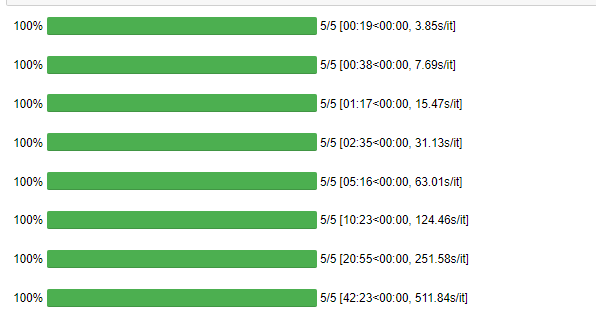

[(2, 26017.787230290272), (4, 25952.660904350574), (8, 25852.660904350574), (16, 25602.328588617263), (32, 25412.199794455744), (64, 25340.596759690772), (128, 25485.620305281456), (256, 25305.620305281456)]


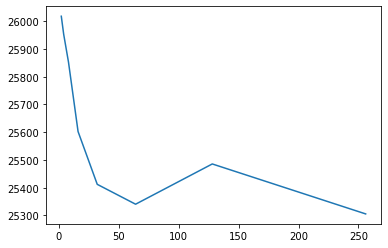

In [258]:
import matplotlib.pyplot as plt
plt.plot(*zip(*sol))
print(sol)

plt.show()

Como podemos ver en la gráfica, el punto cuyo tamaño de colonia corresponde a 125 tiene un coste mayor a otros de ellos. Esto puede resultar debido  ruidos en las muestras ya que solo se realizaron 5 de cada uno de los tamaños 

## Pregunta 3

In [166]:
expe=[x/100 for x in range(0,110,10)]
soluciones_expl=[]
sol_expl=[]
print(expe)
for exp in expe:
    for i in trange(3):
        soluciones_expl.append((colonia_hormigas(g2, 8, 0.001,500 ,5000, 200,  q0=exp))[1])
    sol_expl.append((exp, sum(soluciones_expl)/3))
    soluciones_expl=[]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[(0.0, 30093.57044559732), (0.1, 28659.583104716294), (0.2, 28044.702721457677), (0.3, 28050.469821516977), (0.4, 25442.13690178664), (0.5, 25284.07393356071), (0.6, 24626.698354686592), (0.7, 24178.478629279805), (0.8, 23931.91490368488), (0.9, 24040.95341616806), (1.0, 27033.84988200304)]


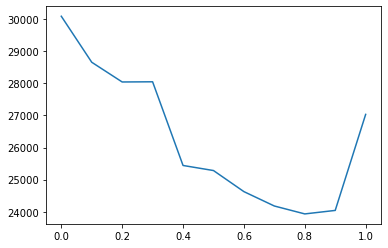

In [260]:
import matplotlib.pyplot as plt

plt.plot(*zip(*sol_expl))
print(sol_expl)

plt.show()

En este caso, tras realizar las pruebas se puede ver a medida que se va aumentando el valor de q0 también se mejoran los resultados obtenidos ya que es más probable que se explote el camino utilizando la matriz de heurística y la de feromonas. Si nos fijamos tiene un coste lineal descendente hasta alrededor de 0.9 donde pasa a crecer. Los picos son ruido ya que, por los tiempos de ejecución del algoritmo tan elevados imposibilita la realización de pruebas con numerosas repeticiones que eliminarín el ruído.

El valor que se optó por escoger es el valor de q0=0.8 ya que es el valor que mejores resultados presenta.
Estos resultados vienen determinados ya que esta es la probabilidad de que el algoritmo explore otros vecindarios diferentes a los basados en la solució voraz inicial por lo que, un valor demasiado bajo dejaría demasiado a la aletoriedad. Por otra parte, si el valor es muy alto entonces la solución final alcazada se guiaría demasiado por la solución inicial (greedy) que puede ser peor en muchos casos.

Tiempos de ejecución:

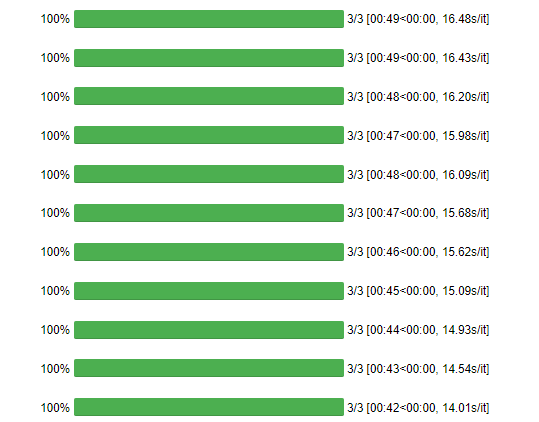

## Pregunta 4

In [174]:
feromA=[1, 2,3,4,5]

soluciones_expl=[]
por_a=[]

for a in feromA:
    for i in trange(3):
        soluciones_expl.append(colonia_hormigas(g2, 8 , 0.001,500 ,4000, 100, alpha=a, beta=3)[1])
        
    por_a.append((a, sum(soluciones_expl)/3))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

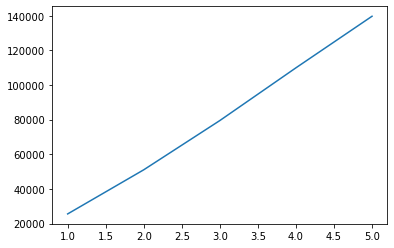

In [261]:
import matplotlib.pyplot as plt

plt.plot(*zip(*por_a))

plt.show()

In [187]:
feromB=[1,2,3,4,5,6,7,8]
soluciones_expl=[]
por_b=[]

for b in feromB:
    for i in trange(3):
        soluciones_expl.append(colonia_hormigas(g2, 8 , 0.001,500 ,4000, 100, alpha=1, beta=b)[1])

    por_b.append((b, sum(soluciones_expl)/3))
    soluciones_expl=[]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

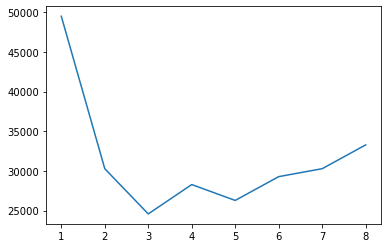

In [262]:
import matplotlib.pyplot as plt

plt.plot(*zip(*por_b))

plt.show()

Para la realización de este ejercicio primero se ha fijado el valor de B y se ha modificado el valor de alpha. Des esta forma veremos como afecta el valor de α a los resultados obtenidos y al tiempo de ejecución tomado.
Tras ello, se optó por fijar el valor de α y variar el de B con la misma finalidad que lo realizado con anterioridad.

Con los resultados obtenidos y viendo las gráficas representadas se puede afirmar que, a menor valor de α mejores resultados se obtienen sin diferencia en el tiempo de ejecución. Esto está determinado ya que, cuiando mayor sea el valor de alpha mayor es el peso que le estamos otorgando a la matriz heurística (al elevar un nñúmero decimal a un número etero, el valor es más pequeño, por lo que los valores de la matriz de feromonas se reduciría).

Por otro lado, en el caso de B ocurre que se encuentra un valor mínimo en el punto 3, obteniendose los mejores resultantes en cuanto al coste. 

Se ha optado por escoger el valor de α=1 y de B= 3 ya que son los que mejores resultados presentan.

Ahora se pasará a realizar una prueba fijando los parámetros e las mejores solucioes para ver el mínimo que se puede obtener

Para los distintos valores de alfa los tiempos fueron los siguientes:
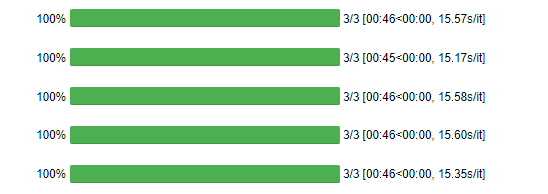


Para los de B:
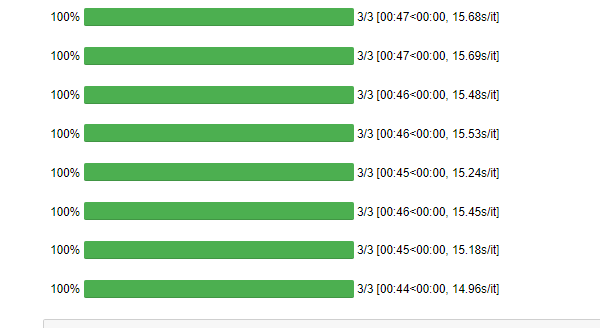

In [254]:
_, costes= colonia_hormigas(g2, 16 , 0.001,500 ,5000, 200, alpha=1, beta=3, q0=0.8)
print(costes)

22599.1646309166


Como vemos el resultado combinando todos los campos obtenemos con esta implementación costes 22599.17

## Pregunta 5



Los algoritmos empleados en la clase práctica han sido: **Temple Simulado**, **Búsqueda Tabú**, **Algoritmos genéticos** y, por último, **Sistema de Colonias de Hormigas**.
Todos los algoritmos ateriormente descritos permiten realizar pruebas con diferentes tamaños pero algunos de ellos imposibilitaban su utilización para tamaños elevados debido al alto tiempo de ejecución.
Por otra parte, los resultados obtenidos cambian de forma muy notable de unos algoritmos a otros. En este apartado se detallarán todos los datos y se analizarán.

| Algoritmo| Resulado  |
| :- | :-: |
| Temple Simulado | 43125.50 |
| Búsqueda Tabú |  31023.58 |
| Algoritmo Genético | 47005.47 |
| Sistema de Colonias de Hormigas | 21000 |

Los resultados mostrados son los obtenidos del Temple Simulado que incluye ciertas mejoras como: el cambio en la velocidad de enfriamiento y también cambiando el criterio de selección de las soluciones candidatas. (ya que era los que mejores resultados presentaba). Por otra parte, la búsqueda tabú también incluía dos mejoras: inicialización greedy o voraz y matriz de frecuencias. Además, los parámetros utilizados para todos los algoritmos eran la mejor combinación obtenida en cada una de las prácticas.

Como vemos en la tabla comparativa para los resultados del coste obtenidos las mejores soluciones se obtienen sin duda mediante el algoritmo genético, seguida de la búsqueda tabú. Pero, no solo se puede comprar el resultado si no que también habría que realizar una métrica del tiempo que tarda en la ejecución de cada algoritmo. Este valor de ejecución no fue contemplado en las prácticas anteriores por lo que no tendremos un valor cuantitativo pero si se podrían ordenar de la siguiete forma de menor tiempo de ejecució a mayor: Temple simulado, Colonia de Hormigas, Algoritmos genéticos y búsqueda tabú.

Podemos ver como el algoritmo de busqueda tabú pese a presentar buenos resultados el tiempo de ejecución es muy elevado por lo que no se recomienda para ejercicios de tamaño elevado.
Si nos fijamos en el algoritmo genético vemos como es el que mejores resultados presetena en un tiempo de ejecución, aunque elevado, razonable.
Podemos ver un patrón ya que, tanto búsqueda tabú y colonias de hormiga presentan buenos resultados y ambas utilizan una inicialización greedy o voraz. Si bien es cierto que para este problema generan mejores soluciones puede que para otros no ya que dependerá de la buena aproximación de la solución voraz a la solución real.

Tras este pequeño estudio comparativo, podemos ver como la mejor solución, pese a presentar tiempos más elevados que el temple simulado, es **sistema de colonias de hormigas** ya que preseta los mejores valores de coste obtenidos comparándolos con los otros 3 algoritmos. Además, la solución aportada se acerca mucho más a la solución real del problema.


